In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/Users/wastechs/Documents/git-repos/energy-efficiency')
from lib.util.helper import query_table, weekday_time_series
from lib import visualizer
import seaborn as sns
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
#df_1T = query_table(table='entsorgung_30T')
ent_week = weekday_time_series(sensor_id='entsorgung_10T')
ent_week['kw'] = round(ent_week['kw'], 2)
ent_week['kw'] = ent_week['kw'].apply(lambda x: 0.0 if x == -0.0 else x)
ent_week['log_kw'] = np.log(ent_week['kw'])

/Users/wastechs/opt/anaconda3/envs/thesis/lib/python3.8/site-packages/matplotlib/patches.py:1074: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xy = np.asarray(xy)


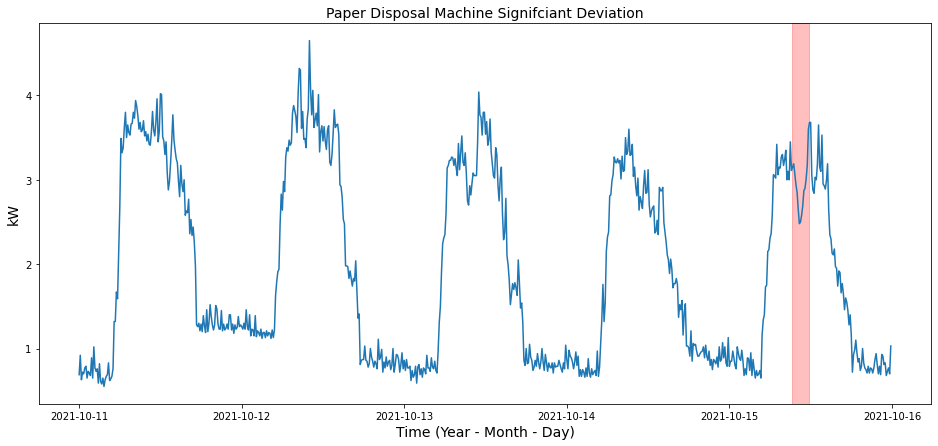

In [12]:
plt.figure(figsize=(16, 7))
plt.plot(ent_week.index, ent_week.kw)
plt.axvspan(
    xmin=['2021-10-15 09:15'], 
    xmax=['2021-10-15 11:45'],
    color='red',
    alpha=0.25)
plt.xlabel('Time (Year - Month - Day)', size=14)
plt.ylabel('kW', size=14)
plt.title('Paper Disposal Machine Signifciant Deviation', size=14)
plt.show()

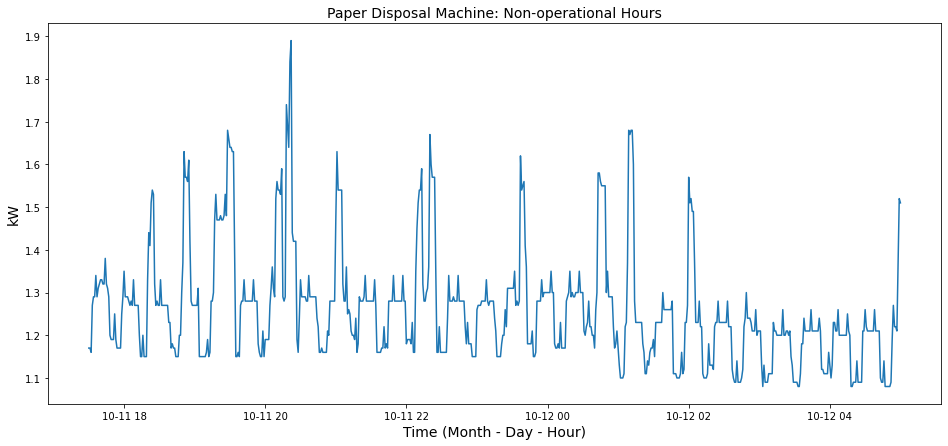

In [16]:
plt.figure(figsize=(16, 7))

plt.plot(
    ent_week['2021-10-11 17:30': '2021-10-12 05:00'].index,
    ent_week['2021-10-11 17:30': '2021-10-12 05:00']['kw']
    )
plt.ylabel('kW', fontsize=14)
plt.xlabel('Time (Month - Day - Hour)', fontsize=14)
plt.title('Paper Disposal Machine: Non-operational Hours', fontsize=14)
plt.show()

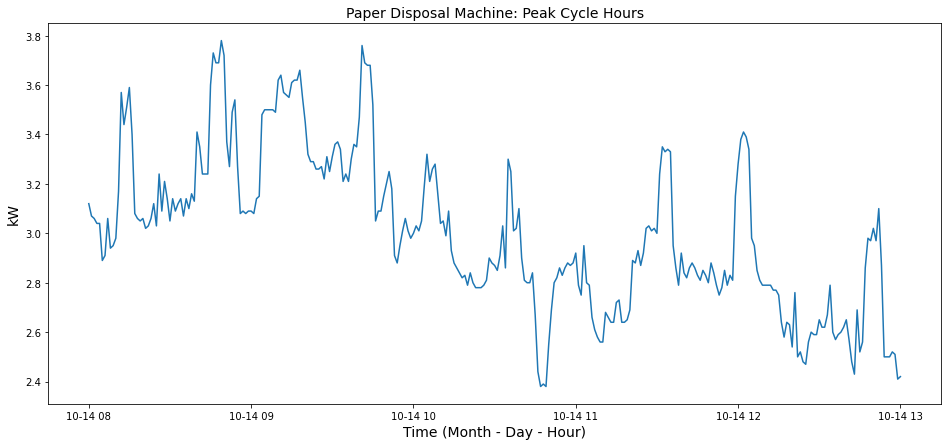

In [15]:
plt.figure(figsize=(16, 7))

plt.plot(
    ent_week['2021-10-14 08:00': '2021-10-14 13:00'].index,
    ent_week['2021-10-14 08:00': '2021-10-14 13:00']['kw']
    )
plt.ylabel('kW', fontsize=14)
plt.xlabel('Time (Month - Day - Hour)', fontsize=14)
plt.title('Paper Disposal Machine: Peak Cycle Hours', fontsize=14)
plt.show()

In [3]:
ent_week.shape

(120, 2)

In [4]:
time_int_range = np.arange(0, 120*60, 60)
ent_week['t'] = time_int_range
ent_week['t_scaled'] = (ent_week['t'] - ent_week['t'].min()) / (ent_week['t'].max() - ent_week['t'].min())

In [5]:
px.line(
    x=ent_week.index, y=ent_week.kw, 
    title='Entsorgung',
    labels={
        'x': 'Time',
        'y': 'kW'
    })

Text(0.5, 1.0, 'Correlogram: Autocorrelation Coefficient')

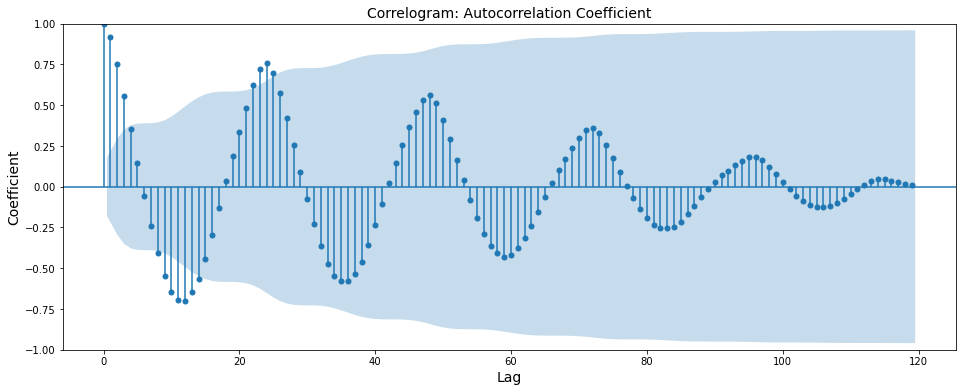

In [9]:
fig, ax = plt.subplots(figsize=(16, 6))
plot_acf(ent_week.kw.values.squeeze(), lags=119, ax=ax)
plt.xlabel('Lag', fontsize=14)
plt.ylabel('Coefficient', fontsize=14)
plt.title('Correlogram: Autocorrelation Coefficient', fontsize=14)

In [ ]:
# Short term interval
ent_week['t_scaled'].iloc[125], ent_week['t_scaled'].iloc[150]

(0.08686587908269632, 0.10423905489923559)

In [ ]:
# Long term interval
ent_week['t_scaled'].iloc[260], ent_week['t_scaled'].iloc[300]

(0.18068102849200834, 0.20847810979847117)

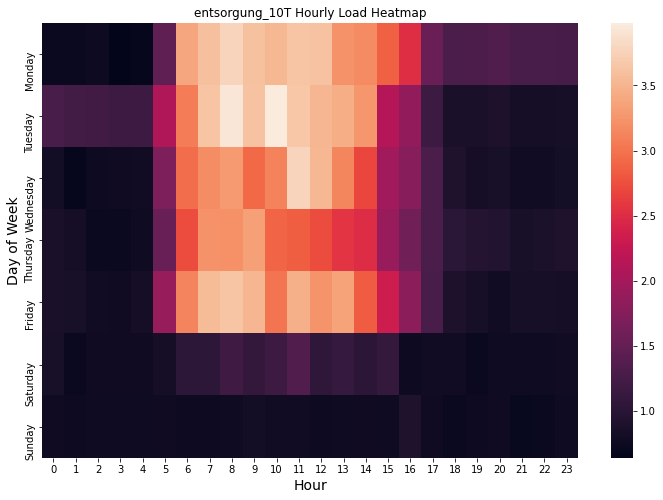

In [ ]:
visualizer.hourly_profile_heatmap(machine='entsorgung_10T')